In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate1 as sr1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
# warnings.filterwarnings('ignore')

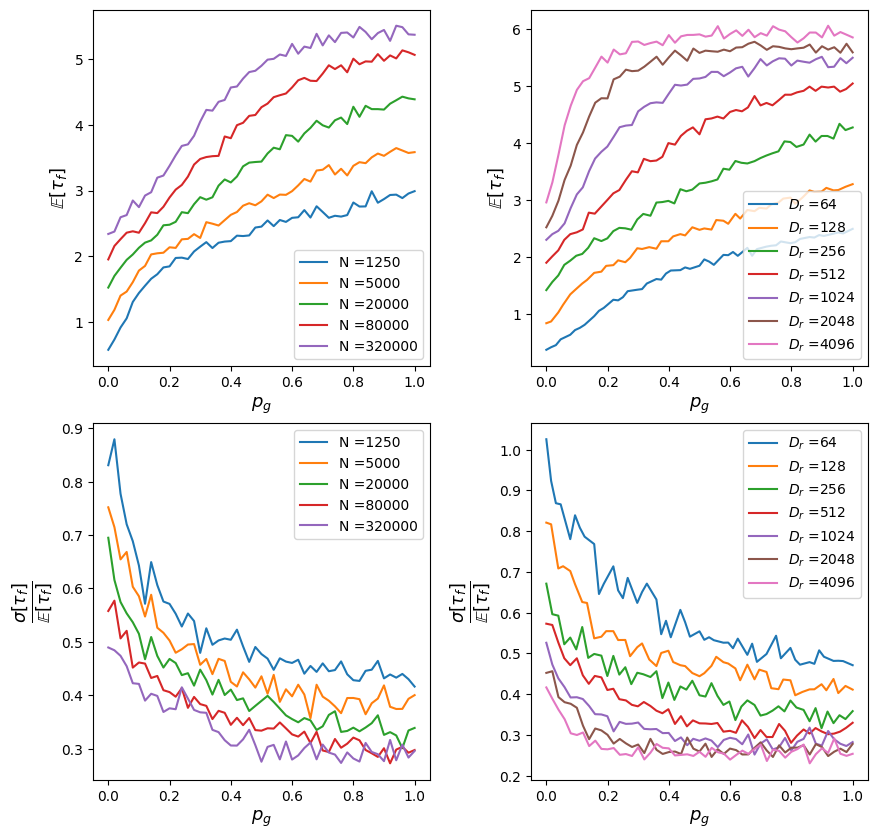

In [2]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
# ax5 = fig.add_subplot(235)
# ax6 = fig.add_subplot(236)
axs = [ax1, ax2, ax3, ax4]#, ax5, ax6]


save_folders = [ '../data/L63-Strategy-varying-trainsize/',\
                '../data/L63-Strategy-varying-featuresize/', '../data/L63-Strategy-varying-beta/']
Ms = [12, 10, 13, 25]
values = [[625*2**n for n in range(1, Ms[1], 2)], [2**n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
values_ = [[np.log2(625*2**n) for n in range(1, Ms[1], 2)], [n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
vars = ['N', r'$D_r$', r'$-\log_2\beta$']
vars_ = [r'$\log_2(\text{sample size})$', r'$\log_2(\text{train size})$', r'$\log_2(D_r)$', r'$-\log_2\beta$']

for i in range(2):
    colors = sns.color_palette()#('husl', len(values[i]))
    axs[i].set_prop_cycle('color', colors)
    axs[i+2].set_prop_cycle('color', colors)
    for j, item in enumerate(values[i]):
        if 2*j < len(values[i]):
            ls = 'solid'
        else:
            ls = 'solid'
        bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[i] + str(item))
        tau, std = bsa.get_line('tau_f_se')
        axs[i].plot(bsa.percents, tau, label=f'{vars[i]} ={item}', linestyle=ls)
        # axs[i].scatter(bsa.percents, tau, s=10, marker='x')
        axs[i+2].plot(bsa.percents, std/tau, label=f'{vars[i]} ={item}', linestyle=ls)
    axs[i].set_xlabel(r'$p_g$', fontsize=13)
    axs[i].set_ylabel(r'$\mathbb{E}[\tau_f]$', fontsize=13)
    axs[i].legend(fontsize=10, loc='lower right')
    axs[i+2].set_xlabel(r'$p_g$', fontsize=13)
    axs[i+2].set_ylabel(r'$\frac{\sigma[\tau_f]}{\mathbb{E}[\tau_f]}$', fontsize=18)
    axs[i+2].legend(fontsize=10, loc='upper right')
# ax1.set_title(r'$D_r=300, \beta=4\times10^{-5}$')
# ax2.set_title(r'$\beta=4\times10^{-5}, N=20000$')
# ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.3)
plt.savefig(f'../data/plots/tau_f_vs_p_g.png', dpi=300, bbox_inches='tight')

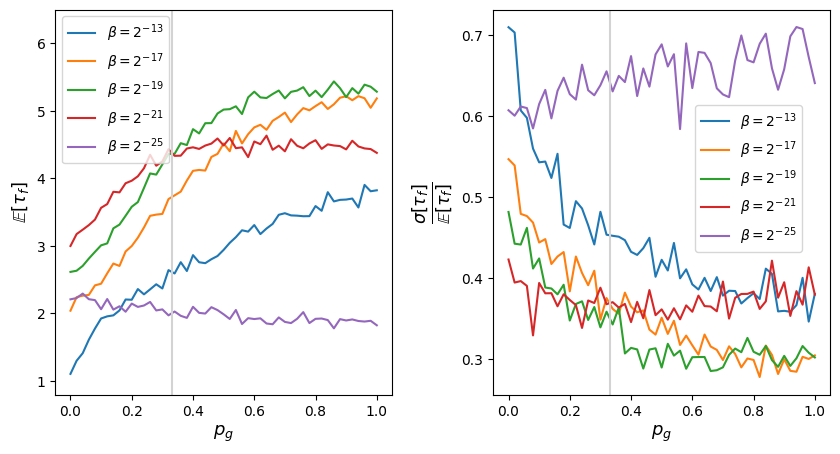

In [18]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
axs = [ax1, ax2]


save_folders = [ '../data/L63-Strategy-varying-trainsize/',\
                '../data/L63-Strategy-varying-featuresize/', '../data/L63-Strategy-varying-beta/']
Ms = [12, 10, 13, 25]
values = [[625*2**n for n in range(1, Ms[1], 2)], [2**n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
values_ = [[np.log2(625*2**n) for n in range(1, Ms[1], 2)], [n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
vars = ['N', r'$D_r$', r'$-\log_2\beta$']
vars_ = [r'$\log_2(\text{sample size})$', r'$\log_2(\text{train size})$', r'$\log_2(D_r)$', r'$-\log_2\beta$']

i=0
axs[i].set_prop_cycle('color', colors)
axs[i+1].set_prop_cycle('color', colors)
for j, item in enumerate(values[-1]):
    if 2*j < len(values[-1]):
        ls = 'solid'
    else:
        ls = 'solid'
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[-1] + str(item))
    tau, std = bsa.get_line('tau_f_se')
    axs[i].plot(bsa.percents, tau, label=fr'$\beta=2^{{{-item}}}$', linestyle=ls)
    # axs[i].scatter(bsa.percents, tau, s=10, marker='x')
    axs[i+1].plot(bsa.percents, std/tau, label=fr'$\beta=2^{{{-item}}}$', linestyle=ls)
    axs[i].set_xlabel(r'$p_g$', fontsize=13)
    axs[i].set_ylabel(r'$\mathbb{E}[\tau_f]$', fontsize=13)
    axs[i].legend(fontsize=10, loc='upper left')
    axs[i+1].set_xlabel(r'$p_g$', fontsize=13)
    axs[i+1].set_ylabel(r'$\frac{\sigma[\tau_f]}{\mathbb{E}[\tau_f]}$', fontsize=18)
    # axs[i+1].legend(fontsize=10, loc='upper left')
ax1.axvline(x=0.33, c='lightgrey')
ax2.axvline(x=0.33, c='lightgrey')
ax2.legend(loc=(0.6, 0.37))
ax1.set_ylim((0.8, 6.5))
# fig.suptitle(r'$D_r=300, N=20000$')
# ax2.set_title(r'$\beta=4\times10^{-5}, N=20000$')
# ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.3)
plt.savefig(f'../data/plots/tau_f_vs_p_g_beta.png', dpi=300, bbox_inches='tight')

-0.5368322983211916 11.996187977683075


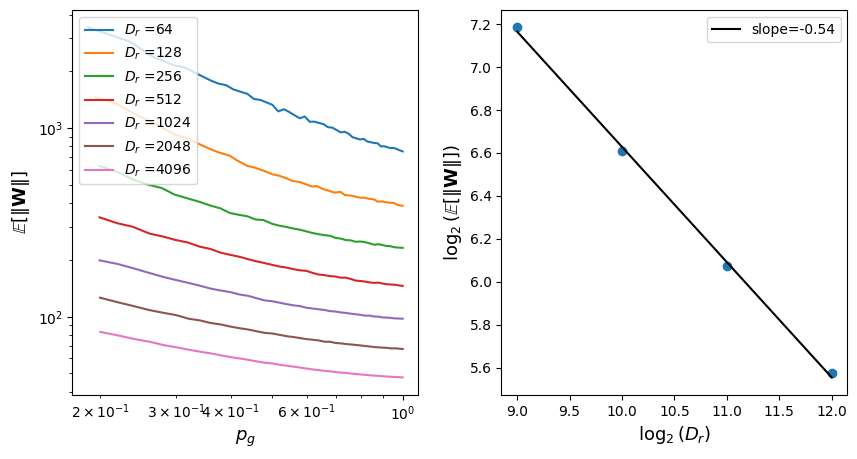

In [4]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# ax3 = fig.add_subplot(133)
# ax3 = fig.add_subplot(233)
# ax4 = fig.add_subplot(234)
# ax5 = fig.add_subplot(235)
# ax6 = fig.add_subplot(236)
axs = [ax1, ax2, ax3]#, ax3, ax4, ax5, ax6]

i = 0
z = np.array(values[1])
colors = sns.color_palette()#('husl', len(values[i]))
axs[i].set_prop_cycle('color', colors)
axs[i+1].set_prop_cycle('color', colors)
y = []
y_ = []
y__ = []
p_gD_r = []
all_tau = []
for j, item in enumerate(values[1]):
    if 2*j < len(values[1]):
        ls = 'solid'
    else:
        ls = 'solid'
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[1] + str(item))
    tau, std = bsa.get_line('||W||')
    zc, std = bsa.get_line('0_cols_W')
    axs[i].loglog(bsa.percents[10:], tau[10:]*bsa.D_r, label=f'{vars[1]} ={item}', linestyle=ls)
    p_gD_r += list(bsa.percents[10:]*bsa.D_r)
    all_tau += list(tau[10:]*bsa.D_r)
    y.append(tau[-1]*bsa.D_r)
    y_.append(tau[np.where(bsa.percents>=0.5)[0][0]]*bsa.D_r)
    y__.append(tau[0]*bsa.D_r)
z, y, y_, y__ = np.log2(z[3:]), np.log2(y[3:]), np.log2(y_[3:]), np.log2(y__[3:])
axs[i+1].scatter(z, y)#, marker='x')
res = stats.linregress(z, y)
a, b = res.slope, res.intercept
res = stats.linregress(z, y_)
a_, b_ = res.slope, res.intercept
res = stats.linregress(z, y__)
a__, b__ = res.slope, res.intercept
axs[i+1].plot(z, a*z+b, c='black', label=fr'slope={a:.2f}')
# axs[i+1].plot(z, a_*z+b_, c='darkgrey', label=fr'slope={a_:.4f}')
# axs[i+1].plot(z, a__*z+b__, c='lightgrey', label=fr'slope={a__:.4f}')



z, y = (p_gD_r), (all_tau), 
# axs[i+2].scatter(z, y, marker='x')
# res = stats.linregress(z, y)
# a, b = res.slope, res.intercept

# axs[i+2].plot(z, y, c='black', marker='.')
# axs[i+2].plot(z, a*z+b, c='darkgrey', label=fr'slope={a:.4f}')





# ax1.set_title(r'$\beta=4\times10^{-5}, N=20000$')
axs[i].set_xlabel(r'$p_g$', fontsize=13)
axs[i].set_ylabel(r'$\mathbb{E}[\|\mathbf{W}\|]$', fontsize=13)
axs[i].legend(fontsize=10, loc='upper left')
# ax2.set_title(r'$p_g=1$')
axs[i+1].set_xlabel(r'$\log_2(D_r)$', fontsize=13)
axs[i+1].set_ylabel(r'$\log_2(\mathbb{E}[\|\mathbf{W}\|])$', fontsize=13)
axs[i+1].legend(fontsize=10, loc='upper right')
# axs[i+2].legend(fontsize=10, loc='upper right')

plt.subplots_adjust(hspace=0.16, wspace=0.24)
plt.savefig(f'../data/plots/W_vs_p_g.png', dpi=300, bbox_inches='tight')
print(a, b)

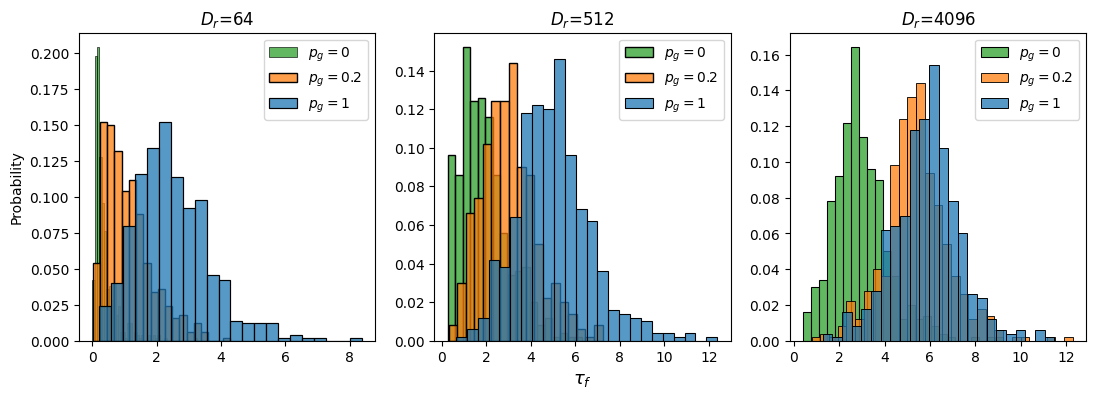

In [5]:
D_rs = [64, 512, 4096]
fig = plt.figure(figsize=(13, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
axs = [ax1, ax2, ax3]
for i, D_r in enumerate(D_rs):
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[1] + str(D_r))
    d = bsa.get_data()
    a = np.unique(d['good_rows_W_in'])
    t0 = d[d['good_rows_W_in']==a[0]]
    t1 = d[d['good_rows_W_in']==a[10]]
    t2 = d[d['good_rows_W_in']==a[-1]]
    
    
    sns.histplot(t0['tau_f_se'], ax=axs[i], label=r'$p_g=0$', color=u'#2ca02c', stat = 'probability')
    sns.histplot(t1['tau_f_se'], ax=axs[i], label=r'$p_g=0.2$', color=u'#ff7f0e', stat = 'probability')
    sns.histplot(t2['tau_f_se'], ax=axs[i], label=r'$p_g=1$', color=u'#1f77b4', stat = 'probability')
    
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].set_title(fr'$D_r$={D_r}')
    axs[i].legend()
ax1.set_ylabel('Probability')
ax2.set_xlabel(r'$\tau_f$',fontsize=13)
plt.savefig('../data/plots/tau_f_dist.png', dpi=300, bbox_inches='tight')

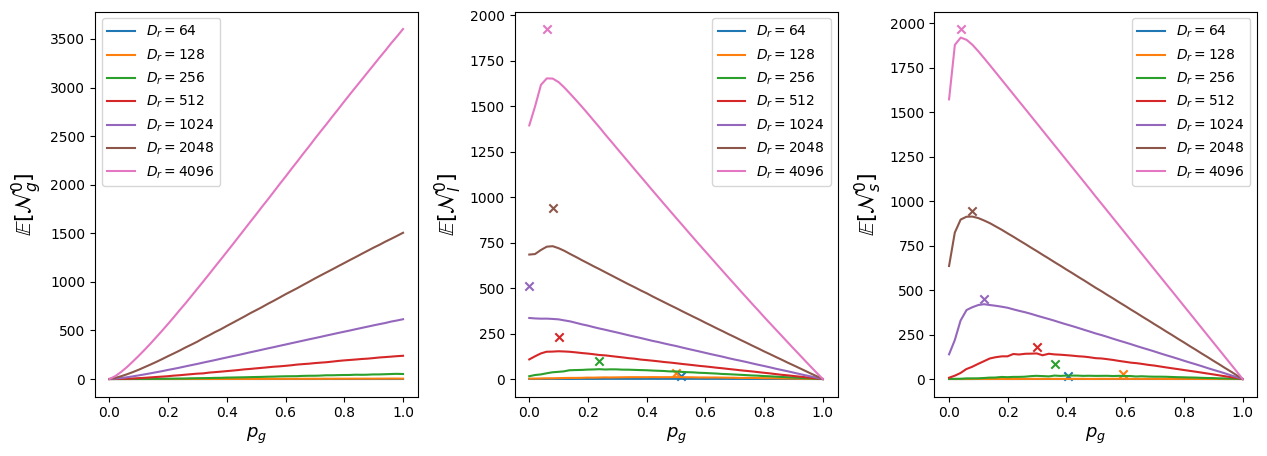

In [92]:
fig = plt.figure(figsize=(15, 5))
# ax1 = fig.add_subplot(231)
# ax2 = fig.add_subplot(232)
# ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(131)
ax5 = fig.add_subplot(132)
ax6 = fig.add_subplot(133)

p_g_0 = []
N_l = []
N_l_0 = []
N_s = []
N_s_0 = []
N_0 = []


idx_1, idx_2 = 10, -10
all_D_r = [64, 128, 256, 512, 1024, 2048, 4096]
for i, D_r in enumerate(all_D_r):
    bsa = sr1.BatchStrategyAnalyzer_SMLR('../data/L63-Strategy-varying-featuresize/'+str(D_r))
    # ratio = bsa.get_line('|W_e|_mean', '|W_g|_mean')[0]
    # ax1.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    # # ax1.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)


    # ratio = bsa.get_line('|W_l|_mean', '|W_g|_mean')[0]
    # ax2.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    # # ax2.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)


    # ratio = bsa.get_line('|W_e|_mean', '|W_l|_mean')[0]
    # ax3.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    # # ax3.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)

    pg = bsa.percents
    pl = 0.5*(1-pg)
    ps = 0.5*(1-pg)
    

    n_g = bsa.get_line('zc_good')[0] * bsa.D_r
    n_l = bsa.get_line('zc_linear')[0] * bsa.D_r
    n_s = bsa.get_line('zc_extreme')[0] * bsa.D_r
    n_0 = n_g + n_l + n_s
    j = np.argmax(n_0)
    pg0 = bsa.percents[0]
    pl0 = (1-pg0)*0.5
    ps0 = 1 - pg0 - pl0

    N_l.append(int(pl0*bsa.D_r))
    N_s.append(int(ps0*bsa.D_r))

    N_l_0.append(n_l[j])
    
    
    ax4.plot(bsa.percents, n_g, label=fr'$D_r=${D_r}')
    # ax4.scatter(bsa.percents, ratio*w, s=5)
    
    ax5.plot(bsa.percents, n_l, label=fr'$D_r=${D_r}')
    l = np.argmax(n_l)
    ax5.scatter(bsa.percents[l], bsa.D_r*(1-bsa.percents[l])/2., marker='x')

    ax6.plot(bsa.percents, n_s, label=fr'$D_r=${D_r}')
    l = np.argmax(n_s)
    ax6.scatter(bsa.percents[l], bsa.D_r*(1-bsa.percents[l])/2., marker='x')
    N_s_0.append(bsa.percents[l])
    N_0.append(bsa.percents[j])

    
    

    # ax6.scatter(bsa.percents, ratio*w, s=5)


# ax1.set_xlabel(r'$p_g$', fontsize=13)
# ax1.set_ylabel(r'$\mathbb{E}\left[\frac{\overline{\mathbf{E}}}{\overline{\mathbf{G}}}\right]$', fontsize=16)
# ax1.legend()


# ax2.set_xlabel(r'$p_g$', fontsize=13)
# ax2.set_ylabel(r'$\mathbb{E}\left[\frac{\overline{\mathbf{L}}}{\overline{\mathbf{G}}}\right]$', fontsize=16)
# ax2.legend()


# ax3.set_xlabel(r'$p_g$', fontsize=13)
# ax3.set_ylabel(r'$\mathbb{E}\left[\frac{\overline{\mathbf{E}}}{\overline{\mathbf{L}}}\right]$', fontsize=16)
# ax3.legend()
N_l = np.array(N_l)
N_s = np.array(N_s)
N_l_0 = np.array(N_l_0)
N_s_0 = np.array(N_s_0)
ax4.set_xlabel(r'$p_g$', fontsize=13)
ax4.set_ylabel(r'$\mathbb{E}[\mathcal{N}^0_g]$', fontsize=16)
ax4.legend()

ax5.set_xlabel(r'$p_g$', fontsize=13)
ax5.set_ylabel(r'$\mathbb{E}[\mathcal{N}^0_l]$', fontsize=16)
ax5.legend()

ax6.set_xlabel(r'$p_g$', fontsize=13)
ax6.set_ylabel(r'$\mathbb{E}[\mathcal{N}^0_s]$', fontsize=16)
ax6.legend()
fig.subplots_adjust(wspace=0.3)
plt.savefig('../data/plots/finer_zero_cols.png', dpi=300, bbox_inches='tight')

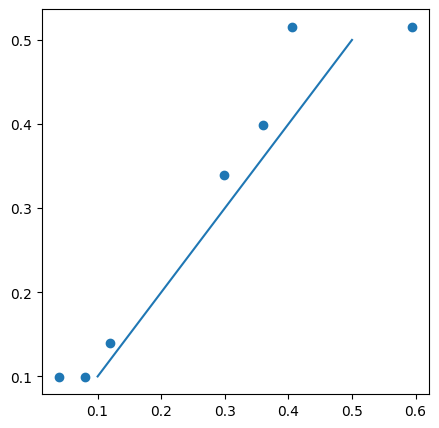

In [94]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
x = np.linspace(0.1, 0.5, 50)
ax1.scatter(N_s_0, N_0)
ax1.plot(x, x)

(-0.7953335117513243, 5.868182926844805)

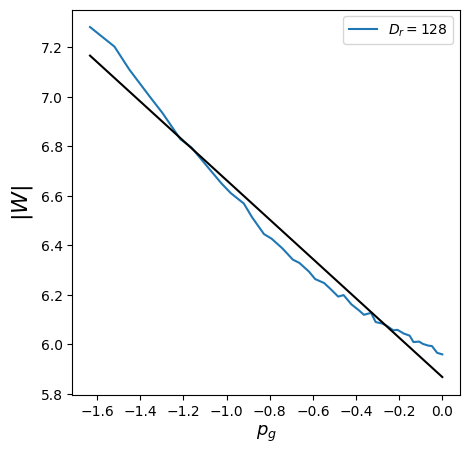

In [75]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
# ax2 = fig.add_subplot(232)
# ax3 = fig.add_subplot(233)
# ax4 = fig.add_subplot(234)
# ax5 = fig.add_subplot(235)
# ax6 = fig.add_subplot(236)




all_D_r = [64, 128, 256, 512, 1024, 2048, 4096]
for i, D_r in enumerate([all_D_r[1]]):
    bsa = sr1.BatchStrategyAnalyzer_SMLR('../data/L63-Strategy-varying-featuresize/'+str(D_r))
    W = bsa.get_line('||W||')[0]
    x, y = np.log(bsa.percents[10:]), np.log(W[10:]*bsa.D_r)
    res = stats.linregress(x, y)
    c, d = res.slope, res.intercept
    ax1.plot(x, y, label=fr'$D_r=${D_r}')
    ax1.plot(x, c*x + d, c='black')
    # ax1.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)


    # ratio = bsa.get_ratio_line('|W_l|_mean', '|W_g|_mean')[0]
    # ax2.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    # # ax2.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)


    # ratio = bsa.get_ratio_line('|W_e|_mean', '|W_l|_mean')[0]
    # ax3.plot(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], label=fr'$D_r=${D_r}')
    # # ax3.scatter(bsa.percents[idx_1: idx_2], ratio[idx_1: idx_2], s=5)


    # ratio = bsa.get_line('zc_good')[0]
    # w = 1.
    # ax4.plot(bsa.percents, ratio*w, label=fr'$D_r=${D_r}')
    # # ax4.scatter(bsa.percents, ratio*w, s=5)

    # ratio = bsa.get_line('zc_linear')[0]
    # w = 1.
    # ax5.plot(bsa.percents, ratio*w, label=fr'$D_r=${D_r}')
    # # ax5.scatter(bsa.percents, ratio*w, s=5)

    # ratio = bsa.get_line('zc_extreme')[0]
    # w = 1.
    # ax6.plot(bsa.percents, ratio*w, label=fr'$D_r=${D_r}')
    # # ax6.scatter(bsa.percents, ratio*w, s=5)


ax1.set_xlabel(r'$p_g$', fontsize=13)
ax1.set_ylabel(r'$|W|$', fontsize=16)
ax1.legend()


# ax2.set_xlabel(r'$p_g$', fontsize=13)
# ax2.set_ylabel(r'$\mathbb{E}_{p_g}\left[\frac{\overline{\mathbf{L}}}{\overline{\mathbf{G}}}\right]$', fontsize=16)
# ax2.legend()


# ax3.set_xlabel(r'$p_g$', fontsize=13)
# ax3.set_ylabel(r'$\mathbb{E}_{p_g}\left[\frac{\overline{\mathbf{E}}}{\overline{\mathbf{L}}}\right]$', fontsize=16)
# ax3.legend()

# ax4.set_xlabel(r'$p_g$', fontsize=13)
# ax4.set_ylabel(r'$\mathbb{E}_{p_g}[Z_g]$', fontsize=16)
# ax4.legend()

# ax5.set_xlabel(r'$p_g$', fontsize=13)
# ax5.set_ylabel(r'$\mathbb{E}_{p_g}[Z_l]$', fontsize=16)
# ax5.legend()

# ax6.set_xlabel(r'$p_g$', fontsize=13)
# ax6.set_ylabel(r'$\mathbb{E}_{p_g}[Z_e]$', fontsize=16)
# ax6.legend()
# fig.subplots_adjust(wspace=0.3)
plt.savefig('../data/plots/|W|.png', dpi=300, bbox_inches='tight')
c, d

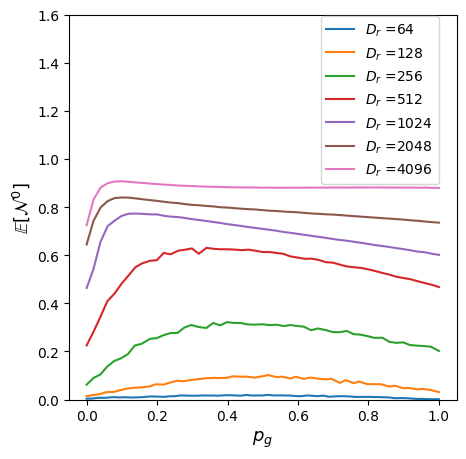

In [79]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)


save_folders = [ '../data/L63-Strategy-varying-trainsize/',\
                '../data/L63-Strategy-varying-featuresize/', '../data/L63-Strategy-varying-beta/']
Ms = [12, 10, 13, 25]
values = [[625*2**n for n in range(1, Ms[1], 2)], [2**n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
values_ = [[np.log2(625*2**n) for n in range(1, Ms[1], 2)], [n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
vars = ['N', r'$D_r$', r'$-\log_2\beta$']
vars_ = [r'$\log_2(\text{sample size})$', r'$\log_2(\text{train size})$', r'$\log_2(D_r)$', r'$-\log_2\beta$']



colors = sns.color_palette()#('husl', len(values[i]))
ax.set_prop_cycle('color', colors)
i = 1
for j, item in enumerate(values[i]):
    if 2*j < len(values[i]):
        ls = 'solid'
    else:
        ls = 'solid'
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[i] + str(item))
    tau, std = bsa.get_line('0_cols_W')
    ax.plot(bsa.percents, tau, label=f'{vars[i]} ={item}', linestyle=ls)
    # ax.scatter(bsa.percents, tau, s=10, marker='x')
    # axs[i+2].plot(bsa.percents, std/tau, label=f'{vars[i]} ={item}', linestyle=ls)
ax.set_xlabel(r'$p_g$', fontsize=13)
ax.set_ylabel(r'$\mathbb{E}[\mathcal{N}^0]$', fontsize=13)
ax.legend(fontsize=10, loc=(0.65, 0.56))
ax.set_ylim((0, 1.6))
ax1.set_title(r'$D_r=300, \beta=4\times10^{-5}$')
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].set_visible(False)
# ax.set_title(r'$\beta=4\times10^{-5}, N=20000$')
# ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.3)
plt.savefig(f'../data/plots/zero_cols-legend-y.png', dpi=300, bbox_inches='tight')

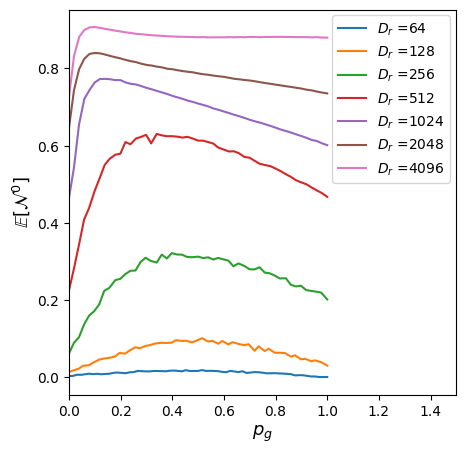

In [75]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)


save_folders = [ '../data/L63-Strategy-varying-trainsize/',\
                '../data/L63-Strategy-varying-featuresize/', '../data/L63-Strategy-varying-beta/']
Ms = [12, 10, 13, 25]
values = [[625*2**n for n in range(1, Ms[1], 2)], [2**n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
values_ = [[np.log2(625*2**n) for n in range(1, Ms[1], 2)], [n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
vars = ['N', r'$D_r$', r'$-\log_2\beta$']
vars_ = [r'$\log_2(\text{sample size})$', r'$\log_2(\text{train size})$', r'$\log_2(D_r)$', r'$-\log_2\beta$']



colors = sns.color_palette()#('husl', len(values[i]))
ax.set_prop_cycle('color', colors)
i = 1
for j, item in enumerate(values[i]):
    if 2*j < len(values[i]):
        ls = 'solid'
    else:
        ls = 'solid'
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[i] + str(item))
    tau, std = bsa.get_line('0_cols_W')
    ax.plot(bsa.percents, tau, label=f'{vars[i]} ={item}', linestyle=ls)
    # ax.scatter(bsa.percents, tau, s=10, marker='x')
    # axs[i+2].plot(bsa.percents, std/tau, label=f'{vars[i]} ={item}', linestyle=ls)
ax.set_xlabel(r'$p_g$', fontsize=13)
ax.set_ylabel(r'$\mathbb{E}[\mathcal{N}^0]$', fontsize=13)
ax.legend(fontsize=10, loc=(0.68, 0.55))
ax.set_xlim((0, 1.5))
ax1.set_title(r'$D_r=300, \beta=4\times10^{-5}$')
# ax.set_title(r'$\beta=4\times10^{-5}, N=20000$')
# ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.3)
plt.savefig(f'../data/plots/zero_cols-legend-x.png', dpi=300, bbox_inches='tight')

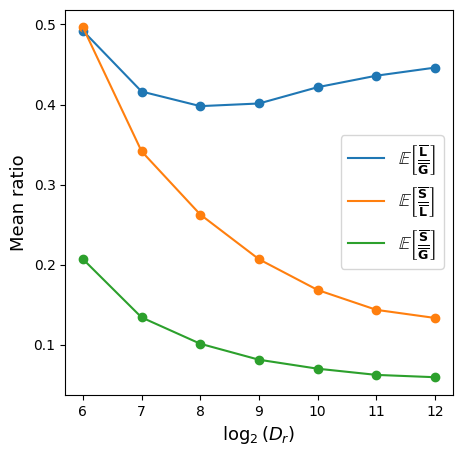

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

all_D_r = [64, 128, 256, 512, 1024, 2048, 4096]
logD_r = np.log2(all_D_r)
wlg = np.zeros(len(all_D_r))
wsl = np.zeros(len(all_D_r))
wsg = np.zeros(len(all_D_r))

for i, D_r in enumerate(all_D_r):
    bsa = sr1.BatchStrategyAnalyzer_SMLR('../data/L63-Strategy-varying-featuresize/'+str(D_r))
    j = np.where(bsa.percents > 0.32)[0][0]
    wlg[i] = bsa.get_ratio_line('|W_l|_mean', '|W_g|_mean')[0][j]
    wsg[i] = bsa.get_ratio_line('|W_e|_mean', '|W_g|_mean')[0][j]
    wsl[i] = bsa.get_ratio_line('|W_e|_mean', '|W_l|_mean')[0][j]

ax.scatter(logD_r, wlg)#, marker='.')
ax.scatter(logD_r, wsl)#, marker='.')
ax.scatter(logD_r, wsg)#, marker='.')
ax.plot(logD_r, wlg, label=r'$\mathbb{E}\left[\frac{\overline{\mathbf{L}}}{\overline{\mathbf{G}}}\right]$')
ax.plot(logD_r, wsl, label=r'$\mathbb{E}\left[\frac{\overline{\mathbf{S}}}{\overline{\mathbf{L}}}\right]$')
ax.plot(logD_r, wsg, label=r'$\mathbb{E}\left[\frac{\overline{\mathbf{S}}}{\overline{\mathbf{G}}}\right]$')
ax.set_xlabel(r'$\log_2(D_r)$', fontsize=13)
ax.set_ylabel(r'Mean ratio', fontsize=13)
# ax.set_title(r'$p_g\approx p_l\approx p_s$')
ax.legend(fontsize=13)
plt.savefig('../data/plots/order-W.png', dpi=300, bbox_inches='tight')

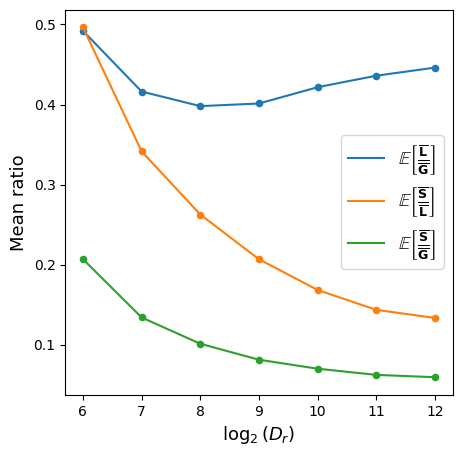

In [8]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

all_D_r = [64, 128, 256, 512, 1024, 2048, 4096]
logD_r = np.log2(all_D_r)
wlg = np.zeros(len(all_D_r))
wsl = np.zeros(len(all_D_r))
wsg = np.zeros(len(all_D_r))

for i, D_r in enumerate(all_D_r):
    bsa = sr1.BatchStrategyAnalyzer_SMLR('../data/L63-Strategy-varying-featuresize/'+str(D_r))
    j = np.where(bsa.percents > 0.32)[0][0]
    wlg[i] = bsa.get_ratio_line('|W_l|_mean', '|W_g|_mean')[0][j]
    wsg[i] = bsa.get_ratio_line('|W_e|_mean', '|W_g|_mean')[0][j]
    wsl[i] = bsa.get_ratio_line('|W_e|_mean', '|W_l|_mean')[0][j]

ax.scatter(logD_r, wlg, s=20)#, marker='.')
ax.scatter(logD_r, wsl, s=20)#, marker='.')
ax.scatter(logD_r, wsg, s=20)#, marker='.')
ax.plot(logD_r, wlg, label=r'$\mathbb{E}\left[\frac{\overline{\mathbf{L}}}{\overline{\mathbf{G}}}\right]$')
ax.plot(logD_r, wsl, label=r'$\mathbb{E}\left[\frac{\overline{\mathbf{S}}}{\overline{\mathbf{L}}}\right]$')
ax.plot(logD_r, wsg, label=r'$\mathbb{E}\left[\frac{\overline{\mathbf{S}}}{\overline{\mathbf{G}}}\right]$')
ax.set_xlabel(r'$\log_2(D_r)$', fontsize=13)
ax.set_ylabel(r'Mean ratio', fontsize=13)
# ax.set_title(r'$p_g\approx p_l\approx p_s$')
ax.legend(fontsize=13)
plt.savefig('../data/plots/order-W.png', dpi=300, bbox_inches='tight')

-0.5169941829201479 11.771356003137912


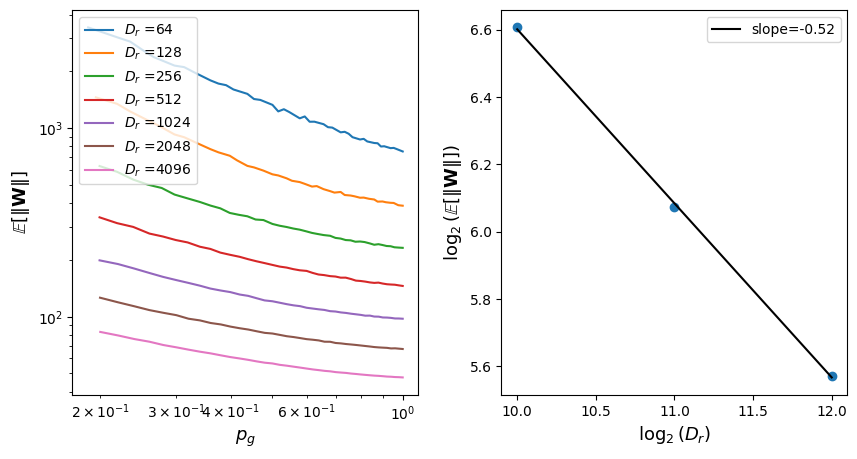

In [9]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# ax3 = fig.add_subplot(133)
# ax3 = fig.add_subplot(233)
# ax4 = fig.add_subplot(234)
# ax5 = fig.add_subplot(235)
# ax6 = fig.add_subplot(236)
axs = [ax1, ax2, ax3]#, ax3, ax4, ax5, ax6]

i = 0
z = np.array(values[1])
colors = sns.color_palette()#('husl', len(values[i]))
axs[i].set_prop_cycle('color', colors)
axs[i+1].set_prop_cycle('color', colors)
y = []
y_ = []
y__ = []
p_gD_r = []
all_tau = []
for j, item in enumerate(values[1]):
    if 2*j < len(values[1]):
        ls = 'solid'
    else:
        ls = 'solid'
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[1] + str(item))
    tau, std = bsa.get_line('||W||')
    zc, std = bsa.get_line('0_cols_W')
    axs[i].loglog(bsa.percents[10:], tau[10:]*bsa.D_r, label=f'{vars[1]} ={item}', linestyle=ls)
    p_gD_r += list(bsa.percents[10:]*bsa.D_r)
    all_tau += list(tau[10:]*bsa.D_r)
    y.append(tau[-1]*bsa.D_r)
    y_.append(tau[np.where(bsa.percents>=0.5)[0][0]]*bsa.D_r)
    y__.append(tau[0]*bsa.D_r)
z, y, y_, y__ = np.log2(z[4:]), np.log2(y[4:]), np.log2(y_[4:]), np.log2(y__[4:])
axs[i+1].scatter(z, y)#, marker='x')
res = stats.linregress(z, y)
a, b = res.slope, res.intercept
res = stats.linregress(z, y_)
a_, b_ = res.slope, res.intercept
res = stats.linregress(z, y__)
a__, b__ = res.slope, res.intercept
axs[i+1].plot(z, a*z+b, c='black', label=fr'slope={a:.2f}')
# axs[i+1].plot(z, a_*z+b_, c='darkgrey', label=fr'slope={a_:.4f}')
# axs[i+1].plot(z, a__*z+b__, c='lightgrey', label=fr'slope={a__:.4f}')



z, y = (p_gD_r), (all_tau), 
# axs[i+2].scatter(z, y, marker='x')
# res = stats.linregress(z, y)
# a, b = res.slope, res.intercept

# axs[i+2].plot(z, y, c='black', marker='.')
# axs[i+2].plot(z, a*z+b, c='darkgrey', label=fr'slope={a:.4f}')





# ax1.set_title(r'$\beta=4\times10^{-5}, N=20000$')
axs[i].set_xlabel(r'$p_g$', fontsize=13)
axs[i].set_ylabel(r'$\mathbb{E}[\|\mathbf{W}\|]$', fontsize=13)
axs[i].legend(fontsize=10, loc='upper left')
# ax2.set_title(r'$p_g=1$')
axs[i+1].set_xlabel(r'$\log_2(D_r)$', fontsize=13)
axs[i+1].set_ylabel(r'$\log_2(\mathbb{E}[\|\mathbf{W}\|])$', fontsize=13)
axs[i+1].legend(fontsize=10, loc='upper right')
# axs[i+2].legend(fontsize=10, loc='upper right')

plt.subplots_adjust(hspace=0.16, wspace=0.24)
plt.savefig(f'../data/plots/W_vs_p_g-1024.png', dpi=300, bbox_inches='tight')
print(a, b)

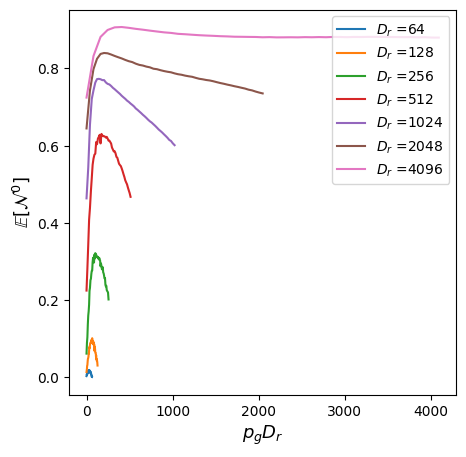

In [13]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)


save_folders = [ '../data/L63-Strategy-varying-trainsize/',\
                '../data/L63-Strategy-varying-featuresize/', '../data/L63-Strategy-varying-beta/']
Ms = [12, 10, 13, 25]
values = [[625*2**n for n in range(1, Ms[1], 2)], [2**n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
values_ = [[np.log2(625*2**n) for n in range(1, Ms[1], 2)], [n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
vars = ['N', r'$D_r$', r'$-\log_2\beta$']
vars_ = [r'$\log_2(\text{sample size})$', r'$\log_2(\text{train size})$', r'$\log_2(D_r)$', r'$-\log_2\beta$']



colors = sns.color_palette()#('husl', len(values[i]))
ax.set_prop_cycle('color', colors)
i = 1
for j, item in enumerate(values[i]):
    if 2*j < len(values[i]):
        ls = 'solid'
    else:
        ls = 'solid'
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[i] + str(item))
    tau, std = bsa.get_line('0_cols_W')
    ax.plot(bsa.percents*bsa.D_r, tau, label=f'{vars[i]} ={item}', linestyle=ls)
    # ax.scatter(bsa.percents, tau, s=10, marker='x')
    # axs[i+2].plot(bsa.percents, std/tau, label=f'{vars[i]} ={item}', linestyle=ls)
ax.set_xlabel(r'$p_gD_r$', fontsize=13)
ax.set_ylabel(r'$\mathbb{E}[\mathcal{N}^0]$', fontsize=13)
ax.legend(fontsize=10, loc='upper right')

ax1.set_title(r'$D_r=300, \beta=4\times10^{-5}$')
# ax.set_title(r'$\beta=4\times10^{-5}, N=20000$')
# ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.3)
plt.savefig(f'../data/plots/zero_cols_p_g_D_r.png', dpi=300, bbox_inches='tight')

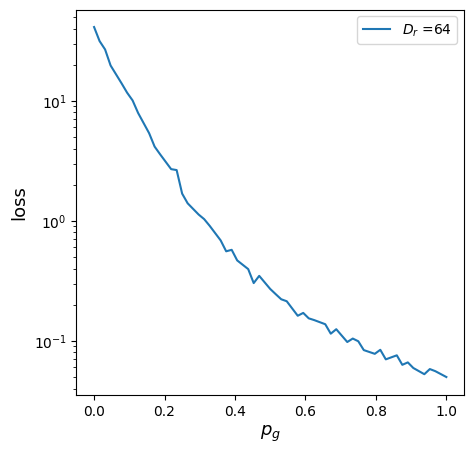

In [27]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)


save_folders = [ '../data/L63-Strategy-varying-trainsize/',\
                '../data/L63-Strategy-varying-featuresize/', '../data/L63-Strategy-varying-beta/']
Ms = [12, 10, 13, 25]
values = [[625*2**n for n in range(1, Ms[1], 2)], [2**n for n in range(6, 7)], [13, 17, 19, 21, 25]]
values_ = [[np.log2(625*2**n) for n in range(1, Ms[1], 2)], [n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
vars = ['N', r'$D_r$', r'$-\log_2\beta$']
vars_ = [r'$\log_2(\text{sample size})$', r'$\log_2(\text{train size})$', r'$\log_2(D_r)$', r'$-\log_2\beta$']



colors = sns.color_palette()#('husl', len(values[i]))
ax.set_prop_cycle('color', colors)
i = 1
for j, item in enumerate(values[i]):
    if 2*j < len(values[i]):
        ls = 'solid'
    else:
        ls = 'solid'
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[i] + str(item))
    tau, std = bsa.get_line('train_loss')
    ax.semilogy(bsa.percents, tau, label=f'{vars[i]} ={item}', linestyle=ls)
    # ax.scatter(bsa.percents, tau, s=10, marker='x')
    # axs[i+2].plot(bsa.percents, std/tau, label=f'{vars[i]} ={item}', linestyle=ls)
ax.set_xlabel(r'$p_g$', fontsize=13)
ax.set_ylabel(r'loss', fontsize=13)
ax.legend(fontsize=10, loc='upper right')

ax1.set_title(r'$D_r=300, \beta=4\times10^{-5}$')
# ax.set_title(r'$\beta=4\times10^{-5}, N=20000$')
# ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.3)
plt.savefig(f'../data/plots/loss_vs_p_g.png', dpi=300, bbox_inches='tight')

AttributeError: 'numpy.ndarray' object has no attribute 'append'

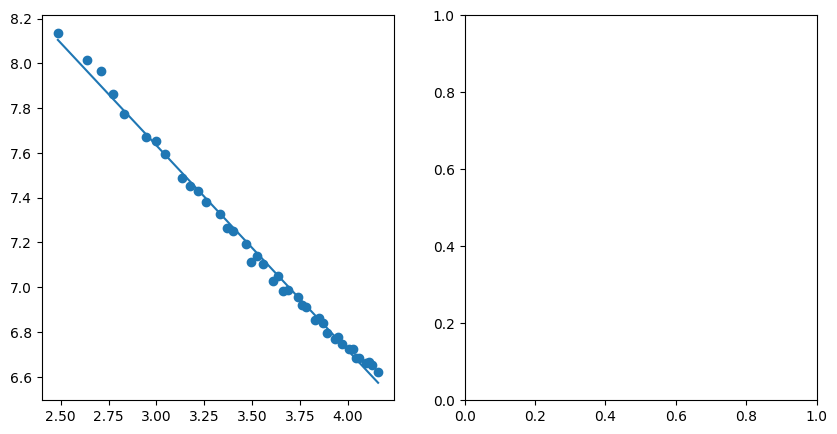

In [30]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# ax3 = fig.add_subplot(133)
# ax3 = fig.add_subplot(233)
# ax4 = fig.add_subplot(234)
# ax5 = fig.add_subplot(235)
# ax6 = fig.add_subplot(236)
axs = [ax1, ax2, ax3]#, ax3, ax4, ax5, ax6]

i = 0
z = np.array(values[1])
colors = sns.color_palette()#('husl', len(values[i]))
axs[i].set_prop_cycle('color', colors)
axs[i+1].set_prop_cycle('color', colors)
y = []
y_ = []
y__ = []
p_gD_r = []
all_tau = []
for j, item in enumerate(values[1]):
    if 2*j < len(values[1]):
        ls = 'solid'
    else:
        ls = 'solid'
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[1] + str(item))
    tau, std = bsa.get_line('||W||')
    zc, std = bsa.get_line('0_cols_W')
    axs[i].scatter(np.log(bsa.percents[10:]*bsa.D_r), np.log(tau[10:]*bsa.D_r), label=f'{vars[1]} ={item}', linestyle=ls)
    x, y = np.log(bsa.percents[10:]*bsa.D_r), np.log(tau[10:]*bsa.D_r)
    res_1 = stats.linregress(x, y)
    a, b = res_1.slope, res_1.intercept
    axs[i].plot(x, a*x + b)    
    p_gD_r += list(bsa.percents[10:]*bsa.D_r)
    all_tau += list(tau[10:]*bsa.D_r)
    y.append(tau[-1]*bsa.D_r)
    y_.append(tau[np.where(bsa.percents>=0.5)[0][0]]*bsa.D_r)
    y__.append(tau[0]*bsa.D_r)
z, y, y_, y__ = np.log2(z[4:]), np.log2(y[4:]), np.log2(y_[4:]), np.log2(y__[4:])
axs[i+1].scatter(z, y)#, marker='x')
res = stats.linregress(z, y)
a, b = res.slope, res.intercept
res = stats.linregress(z, y_)
a_, b_ = res.slope, res.intercept
res = stats.linregress(z, y__)
a__, b__ = res.slope, res.intercept
axs[i+1].plot(z, a*z+b, c='black', label=fr'slope={a:.2f}')
# axs[i+1].plot(z, a_*z+b_, c='darkgrey', label=fr'slope={a_:.4f}')
# axs[i+1].plot(z, a__*z+b__, c='lightgrey', label=fr'slope={a__:.4f}')



z, y = (p_gD_r), (all_tau), 
# axs[i+2].scatter(z, y, marker='x')
# res = stats.linregress(z, y)
# a, b = res.slope, res.intercept

# axs[i+2].plot(z, y, c='black', marker='.')
# axs[i+2].plot(z, a*z+b, c='darkgrey', label=fr'slope={a:.4f}')





# ax1.set_title(r'$\beta=4\times10^{-5}, N=20000$')
axs[i].set_xlabel(r'$p_gD_r$', fontsize=13)
axs[i].set_ylabel(r'$\mathbb{E}[\|\mathbf{W}\|]$', fontsize=13)
axs[i].legend(fontsize=10, loc='upper left')
# ax2.set_title(r'$p_g=1$')
axs[i+1].set_xlabel(r'$\log_2(D_r)$', fontsize=13)
axs[i+1].set_ylabel(r'$\log_2(\mathbb{E}[\|\mathbf{W}\|])$', fontsize=13)
axs[i+1].legend(fontsize=10, loc='upper right')
# axs[i+2].legend(fontsize=10, loc='upper right')

plt.subplots_adjust(hspace=0.16, wspace=0.24)
plt.savefig(f'../data/plots/W_vs_p_gD_r-1024.png', dpi=300, bbox_inches='tight')
print(a, b)

In [31]:
res_1.slope

-0.9150196691181801

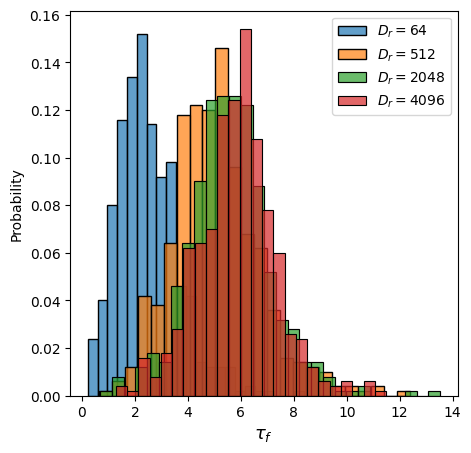

In [97]:
D_rs = [64, 512, 2048, 4096]
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
i=0
axs = [ax]
bsa_0 = sr1.BatchStrategyAnalyzer_SMLR(save_folders[1] + str(D_rs[0])).get_data()
bsa_1 = sr1.BatchStrategyAnalyzer_SMLR(save_folders[1] + str(D_rs[1])).get_data()
bsa_2 = sr1.BatchStrategyAnalyzer_SMLR(save_folders[1] + str(D_rs[2])).get_data()
bsa_3 = sr1.BatchStrategyAnalyzer_SMLR(save_folders[1] + str(D_rs[3])).get_data()

t0 = bsa_0[bsa_0['good_rows_W_in']==1.0]['tau_f_se'].to_numpy()
t1 = bsa_1[bsa_1['good_rows_W_in']==1.0]['tau_f_se'].to_numpy()
t2 = bsa_2[bsa_2['good_rows_W_in']==1.0]['tau_f_se'].to_numpy()
t3 = bsa_3[bsa_3['good_rows_W_in']==1.0]['tau_f_se'].to_numpy()

# sns.histplot(t0, ax=axs[i], label=fr'$D_r={D_rs[0]}$,'+r'$\;\mathbb{E}[\tau_f]$'+f'={t0.mean():.2f},'+r'$\;\mathbb{\sigma}[\tau_f]$'+f'={t0.std():.2f}',  stat = 'probability', alpha=0.7)
# sns.histplot(t1, ax=axs[i], label=fr'$D_r={D_rs[1]}$,'+r'$\;\mathbb{E}[\tau_f]$'+f'={t1.mean():.2f},'+r'$\;\mathbb{\sigma}[\tau_f]$'+f'={t1.std():.2f}',  stat = 'probability', alpha=0.7)
# sns.histplot(t2, ax=axs[i], label=fr'$D_r={D_rs[2]}$,'+r'$\;\mathbb{E}[\tau_f]$'+f'={t2.mean():.2f},'+r'$\;\mathbb{\sigma}[\tau_f]$'+f'={t2.std():.2f}',  stat = 'probability', alpha=0.7)
# sns.histplot(t3, ax=axs[i], label=fr'$D_r={D_rs[3]}$,'+r'$\;\mathbb{E}[\tau_f]$'+f'={t3.mean():.2f},'+r'$\;\mathbb{\sigma}[\tau_f]$'+f'={t3.std():.2f}',  stat = 'probability', alpha=0.7)

sns.histplot(t0, ax=axs[i], label=fr'$D_r={D_rs[0]}$',  stat = 'probability', alpha=0.7)
sns.histplot(t1, ax=axs[i], label=fr'$D_r={D_rs[1]}$',  stat = 'probability', alpha=0.7)
sns.histplot(t2, ax=axs[i], label=fr'$D_r={D_rs[2]}$',  stat = 'probability', alpha=0.7)
sns.histplot(t3, ax=axs[i], label=fr'$D_r={D_rs[3]}$',  stat = 'probability', alpha=0.7)

axs[i].set_xlabel(None)
axs[i].set_ylabel(None)
# axs[i].set_title(fr'$D_r$={D_r}')
axs[i].legend()
ax.set_ylabel('Probability')
ax.set_xlabel(r'$\tau_f$',fontsize=13)
plt.savefig('../data/plots/tau_f_dist_evol-64-512-2048-4096-wl.png', dpi=300, bbox_inches='tight')

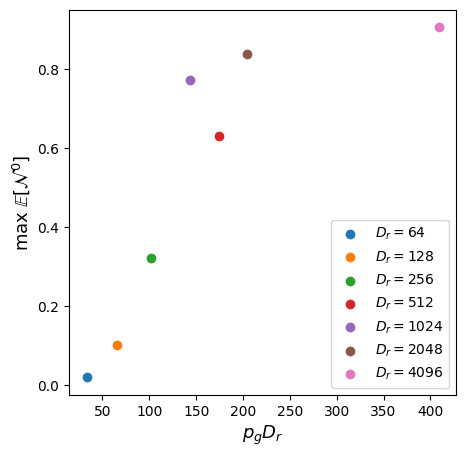

In [10]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)


save_folders = [ '../data/L63-Strategy-varying-trainsize/',\
                '../data/L63-Strategy-varying-featuresize/', '../data/L63-Strategy-varying-beta/']
Ms = [12, 10, 13, 25]
values = [[625*2**n for n in range(1, Ms[1], 2)], [2**n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
values_ = [[np.log2(625*2**n) for n in range(1, Ms[1], 2)], [n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
vars = ['N', r'$D_r$', r'$-\log_2\beta$']
vars_ = [r'$\log_2(\text{sample size})$', r'$\log_2(\text{train size})$', r'$\log_2(D_r)$', r'$-\log_2\beta$']



colors = sns.color_palette()#('husl', len(values[i]))
ax.set_prop_cycle('color', colors)
i = 1
x, y = [], []
for j, item in enumerate(values[i]):
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[i] + str(item))
    tau, std = bsa.get_line('0_cols_W')
    k = np.argmax(tau)
    x.append(bsa.percents[k]*bsa.D_r)
    y.append(tau[k])
    ax.scatter(x[-1], y[-1], label=fr'$D_r=${item}')
ax.set_xlabel(r'$p_gD_r$', fontsize=13)
ax.set_ylabel(r'$\max\;\mathbb{E}[\mathcal{N}^0]$', fontsize=13)
ax.legend(fontsize=10, loc='lower right')

ax1.set_title(r'$D_r=300, \beta=4\times10^{-5}$')
# ax.set_title(r'$\beta=4\times10^{-5}, N=20000$')
# ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.3)
plt.savefig(f'../data/plots/max_N_0.png', dpi=300, bbox_inches='tight')

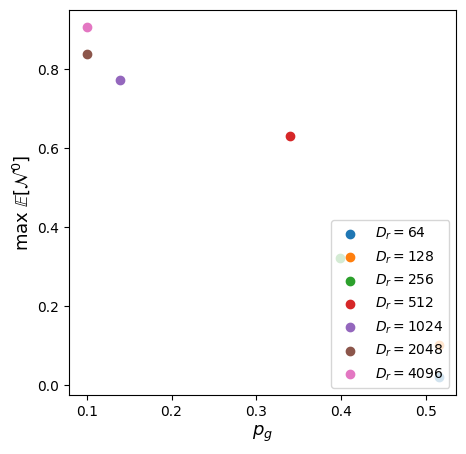

In [13]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)


save_folders = [ '../data/L63-Strategy-varying-trainsize/',\
                '../data/L63-Strategy-varying-featuresize/', '../data/L63-Strategy-varying-beta/']
Ms = [12, 10, 13, 25]
values = [[625*2**n for n in range(1, Ms[1], 2)], [2**n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
values_ = [[np.log2(625*2**n) for n in range(1, Ms[1], 2)], [n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
vars = ['N', r'$D_r$', r'$-\log_2\beta$']
vars_ = [r'$\log_2(\text{sample size})$', r'$\log_2(\text{train size})$', r'$\log_2(D_r)$', r'$-\log_2\beta$']



colors = sns.color_palette()#('husl', len(values[i]))
ax.set_prop_cycle('color', colors)
i = 1
x, y = [], []
for j, item in enumerate(values[i]):
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[i] + str(item))
    tau, std = bsa.get_line('0_cols_W')
    k = np.argmax(tau)
    x.append(bsa.percents[k])
    y.append(tau[k])
    ax.scatter(x[-1], y[-1], label=fr'$D_r=${item}')
ax.set_xlabel(r'$p_g$', fontsize=13)
ax.set_ylabel(r'$\max\;\mathbb{E}[\mathcal{N}^0]$', fontsize=13)
ax.legend(fontsize=10, loc='lower right')

ax1.set_title(r'$D_r=300, \beta=4\times10^{-5}$')
# ax.set_title(r'$\beta=4\times10^{-5}, N=20000$')
# ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.3)
plt.savefig(f'../data/plots/max_N_0_p_g.png', dpi=300, bbox_inches='tight')

In [14]:
x

[0.515625,
 0.515625,
 0.3984375,
 0.33984375,
 0.1396484375,
 0.099609375,
 0.099853515625]

In [17]:
4096*0.0798

326.8608

In [16]:
bsa.percents

array([0.        , 0.01977539, 0.03979492, 0.05981445, 0.07983398,
       0.09985352, 0.11987305, 0.13989258, 0.15991211, 0.17993164,
       0.19995117, 0.2199707 , 0.23999023, 0.25976562, 0.27978516,
       0.29980469, 0.31982422, 0.33984375, 0.35986328, 0.37988281,
       0.39990234, 0.41992188, 0.43994141, 0.45996094, 0.47998047,
       0.5       , 0.51977539, 0.53979492, 0.55981445, 0.57983398,
       0.59985352, 0.61987305, 0.63989258, 0.65991211, 0.67993164,
       0.69995117, 0.7199707 , 0.73999023, 0.75976562, 0.77978516,
       0.79980469, 0.81982422, 0.83984375, 0.85986328, 0.87988281,
       0.89990234, 0.91992188, 0.93994141, 0.95996094, 0.97998047,
       1.        ])

3.179594229581101
1.8159956477124604
0.773343485282001
-0.16199025064901612
-0.965152486262561
-1.7056193226027767
-2.400104579026679


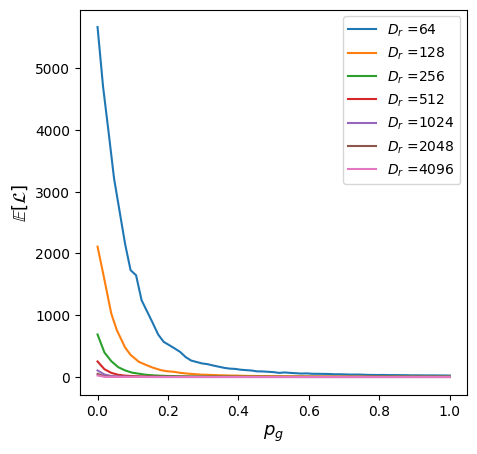

In [15]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)


save_folders = [ '../data/L63-Strategy-varying-trainsize/',\
                '../data/L63-Strategy-varying-featuresize/', '../data/L63-Strategy-varying-beta/']
Ms = [12, 10, 13, 25]
values = [[625*2**n for n in range(1, Ms[1], 2)], [2**n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
values_ = [[np.log2(625*2**n) for n in range(1, Ms[1], 2)], [n for n in range(6, Ms[2])], [13, 17, 19, 21, 25]]
vars = ['N', r'$D_r$', r'$-\log_2\beta$']
vars_ = [r'$\log_2(\text{sample size})$', r'$\log_2(\text{train size})$', r'$\log_2(D_r)$', r'$-\log_2\beta$']



colors = sns.color_palette()#('husl', len(values[i]))
ax.set_prop_cycle('color', colors)
i = 1
for j, item in enumerate(values[i]):
    if 2*j < len(values[i]):
        ls = 'solid'
    else:
        ls = 'solid'
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[i] + str(item))
    tau, std = bsa.get_line('train_loss')
    ax.plot(bsa.percents, tau, label=f'{vars[i]} ={item}', linestyle=ls)
    print(np.log(tau[-1]))
    # ax.scatter(bsa.percents, tau, s=10, marker='x')
    # axs[i+2].plot(bsa.percents, std/tau, label=f'{vars[i]} ={item}', linestyle=ls)
ax.set_xlabel(r'$p_g$', fontsize=13)
ax.set_ylabel(r'$\mathbb{E}[\mathcal{L}]$', fontsize=13)
ax.legend(fontsize=10, loc='upper right')

ax1.set_title(r'$D_r=300, \beta=4\times10^{-5}$')
# ax.set_title(r'$\beta=4\times10^{-5}, N=20000$')
# ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.3)
plt.savefig(f'../data/plots/loss_p_g_plot.png', dpi=300, bbox_inches='tight')